In [1]:
import os
import sys

# Go up one directory level to reach root
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)

# Add root to Python path
sys.path.insert(0, root_dir)

print(f"Current working directory: {os.getcwd()}")
print(f"Root directory added to path: {root_dir}")

Current working directory: /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui
Root directory added to path: /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui


In [2]:
%load_ext autoreload
%autoreload 2
from functions._utils_ import *

labels = ["benign", "cancer"]

### DATASET SETUP (ModPoly)

In [ ]:
chumDF_benign = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "ModPolyv2",
    "chum_benign.pkl"
))

chumDF_cancer = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "ModPolyv2",
    "chum_cancer.pkl"
))

In [ ]:
uhnDF_benign = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "ModPolyv2",
    "uhn_benign.pkl"
))

uhnDF_cancer = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "ModPolyv2",
    "uhn_cancer.pkl"
))

In [ ]:
chuqDF_benign = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "ModPolyv2",
    "chuq_benign.pkl"
))

chuqDF_cancer = load_pickle(os.path.join(
    CURRENT_DIR,
    "data",
    "preprocessed_data", "ModPolyv2",
    "chuq_cancer.pkl"
))

In [6]:
cancer_spectra = [(uhnDF_cancer, "uhndf-cancer"),
                  (chuqDF_cancer, "chuqdf-cancer")]
benign_spectra = [(chuqDF_benign, "chuqdf-benign"),
                  (uhnDF_benign, "uhndf-benign")]
labels_spectra = [k[1] for k in cancer_spectra + benign_spectra]
test_spectra = [k[0]["processed"] for k in cancer_spectra + benign_spectra]
true_labels = []
for k in cancer_spectra + benign_spectra:
    true_labels.extend(k[0]["labels"])
    
sample_indices = [15, 2565, 2581, 315]  # [1538, 2565, 2678, 315]
region = (600, 1600)

### TESTING WITH CalibratedClassifierCV SVC LINEAR MODEL (ModPoly)

In [ ]:
cccv_svc_linear_path = os.path.join(
    CURRENT_DIR,
    "models",
    "CCCV-SVC-LINEAR",
    "CCCV-SVC-LINEAR_raman_prostate_model_v2"
)

cccv_svc_linear_model = MLModel(
    onnx_path=f"{cccv_svc_linear_path}.onnx",
    meta_path=f"{cccv_svc_linear_path}.json",
    pickle_path=f"{cccv_svc_linear_path}.pkl",
    region=region
)

2025-06-12 03:00:48,925 - load_onnx - INFO - Model loaded from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/CCCV-SVC-LINEAR/CCCV-SVC-LINEAR_raman_prostate_model_v1.onnx and metadata from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/CCCV-SVC-LINEAR/CCCV-SVC-LINEAR_raman_prostate_model_v1.json
2025-06-12 03:00:49,529 - pickle_load - INFO - Model loaded from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/CCCV-SVC-LINEAR/CCCV-SVC-LINEAR_raman_prostate_model_v1.pkl and metadata from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/CCCV-SVC-LINEAR/CCCV-SVC-LINEAR_raman_prostate_model_v1.json


In [8]:
cccv_svc_linear_get_predictions = cccv_svc_linear_model.predict(
    test_spectra=test_spectra,
    true_labels=true_labels,
    use_onnx=False,
)

'Interpolating spectra from 41145 to 24552 features'
'Interpolating spectra from 40380 to 24552 features'
'Interpolating spectra from 4475 to 24552 features'
'Interpolating spectra from 5370 to 24552 features'
'Predicting all 2736 samples'
'Predicting 2736 samples with 24552 features using sklearn'


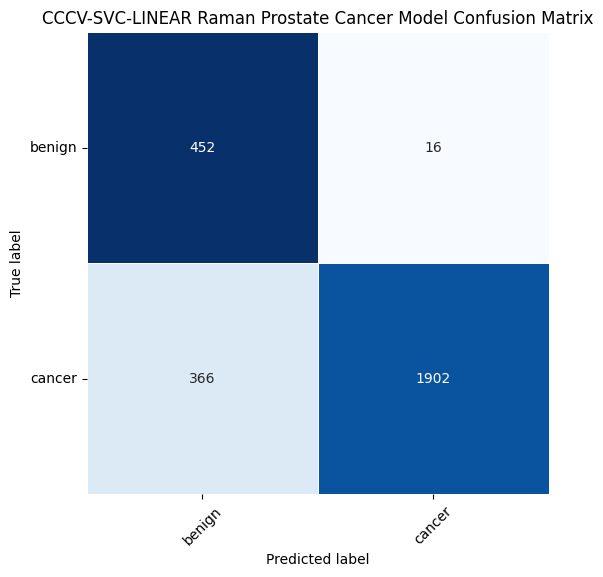

'Predict Accuracy:'
'====================================='
'benign: 96.58%'
'cancer: 83.86%'


In [9]:
visual_cccv_svc_linear = RamanVisualizer(ML_PROPERTY=cccv_svc_linear_model)

predict_accuracy, plotdata = visual_cccv_svc_linear.confusion_matrix_heatmap(
    y_true=cccv_svc_linear_model.y_true,          # true labels for test set
    y_pred=cccv_svc_linear_model.y_pred,  # predicted labels for test set
    class_labels=labels,    # class names, e.g. ["benign", "cancer"]
    title=f"{cccv_svc_linear_model._name} Confusion Matrix",
    normalize=False,
    cmap="Blues",
    figsize=(8, 6),
    fmt="d",
)

console_log("Predict Accuracy:")
console_log("=====================================")
for i, (label, percentage) in enumerate(predict_accuracy.items()):
    console_log(f"{label}: {percentage:.2f}%")

'Sample indices for inspection: [15, 2565, 2581, 315]'
'Using MLModel with model type: CalibratedClassifierCV'
'📊 Using provided test_spectra and true_labels'
'Inspecting 4 spectra...'
'\nAnalyzing spectrum 1/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting SHAP explanation analysis...'
🔧 Detecting model type...
📋 Detected CalibratedClassifierCV - extracting base estimator...
📊 Model Analysis:
   - Original model: CalibratedClassifierCV
   - Base estimator: Unknown
   - Using base estimator for SHAP: True
   - SHAP model type: CalibratedClassifierCV
   - Is Calibrated: True, Base SVC: False, Base RF: False, Linear SVC: False
⚡ Optimizing data for performance...
'🔬 Computing SHAP values for 1 samples with 50 background samples...'
🔬 Creating SHAP explainer...
🔄 Using KernelExplainer for CalibratedClassifierCV (fallback mode)...


  0%|          | 0/1 [00:00<?, ?it/s]

📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ SHAP explanation completed successfully in 40.00 seconds!'


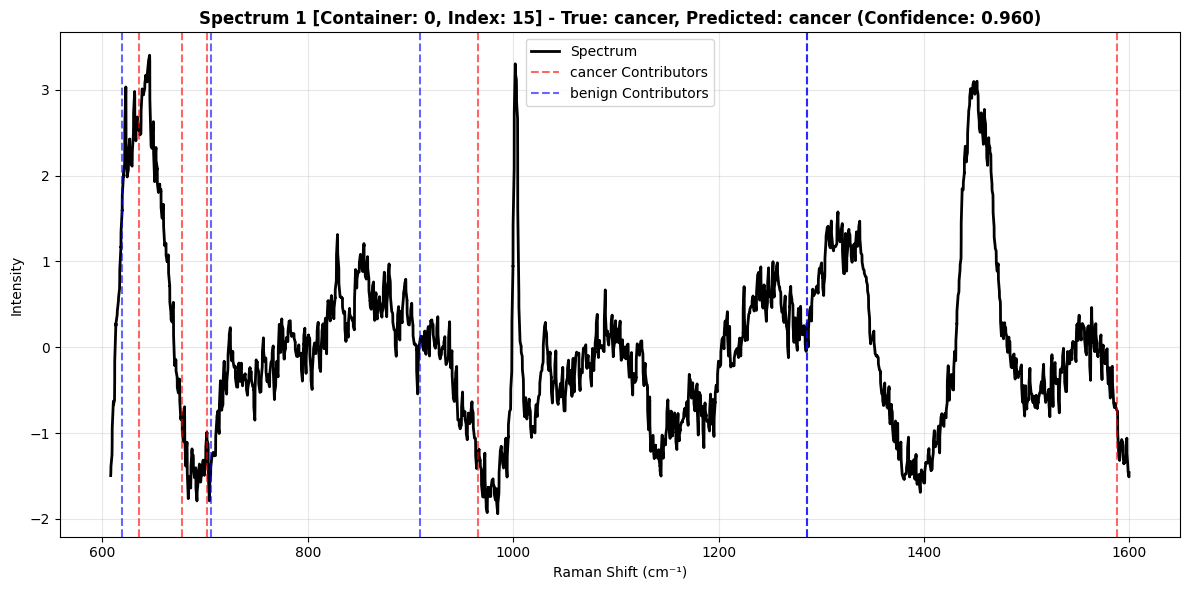

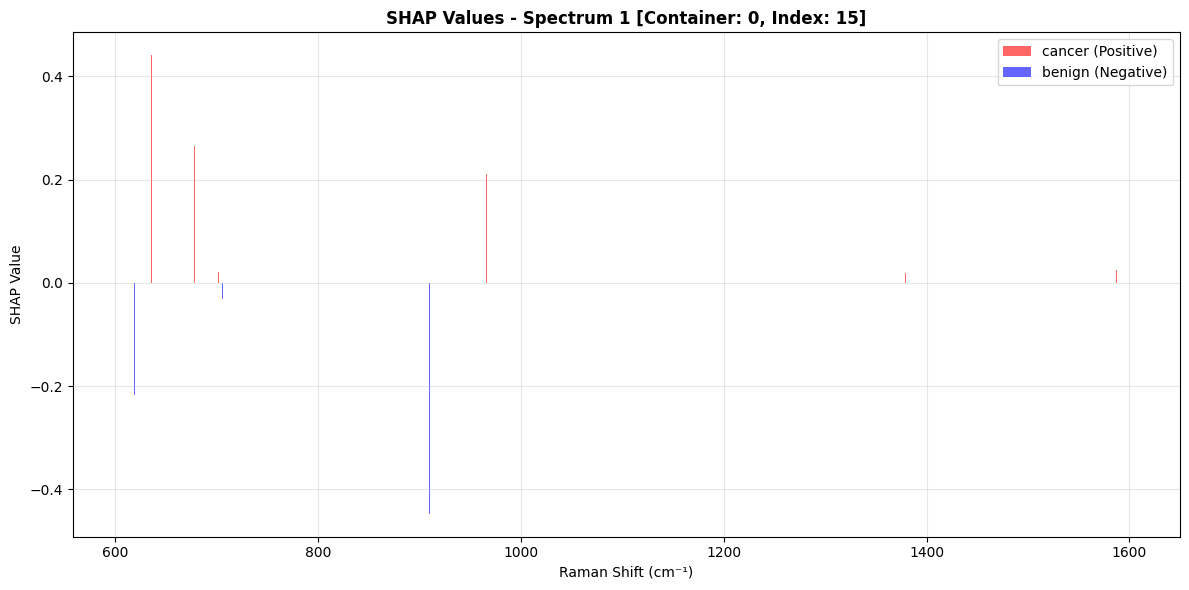

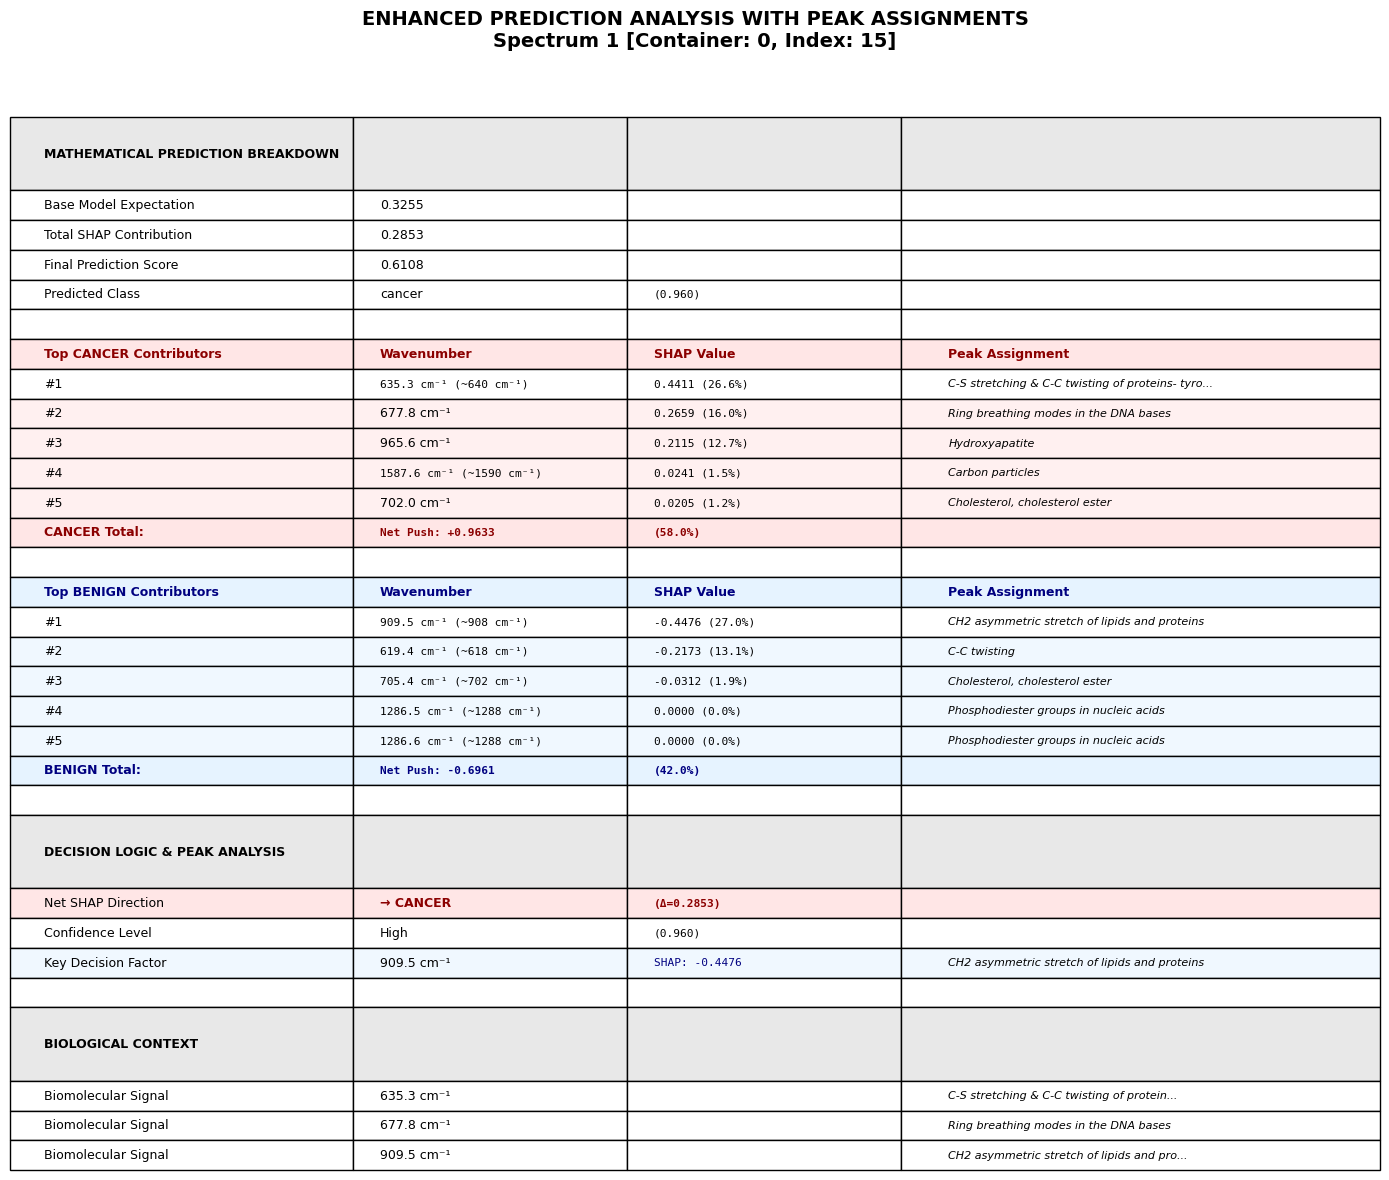

'Spectrum 1 Summary [Container: 0, Index: 15]:'
'  True Label: cancer'
'  Predicted: cancer (Confidence: 0.960)'
'  Correct: Yes'
'  Top cancer contributor: 635.3 cm⁻¹ (SHAP: 0.4411)'
'  Top benign contributor: 909.5 cm⁻¹ (SHAP: -0.4476)'
'\nAnalyzing spectrum 2/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting SHAP explanation analysis...'
🔧 Detecting model type...
📋 Detected CalibratedClassifierCV - extracting base estimator...
📊 Model Analysis:
   - Original model: CalibratedClassifierCV
   - Base estimator: Unknown
   - Using base estimator for SHAP: True
   - SHAP model type: CalibratedClassifierCV
   - Is Calibrated: True, Base SVC: False, Base RF: False, Linear SVC: False
⚡ Optimizing data for performance...
'🔬 Computing SHAP values for 1 samples with 50 background samples...'
🔬 Creating SHAP explainer...
🔄 Using KernelExplainer for CalibratedClassifierCV (fallback mode)...


  0%|          | 0/1 [00:00<?, ?it/s]

/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.895e-01, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/shap/explainers/_kernel.py:708: UserWarning: Linear regression equation is singular, a least squares solutions is used instead.
To avoid this situation and get a regular matrix do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
  warnings.warn(


📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ SHAP explanation completed successfully in 63.20 seconds!'


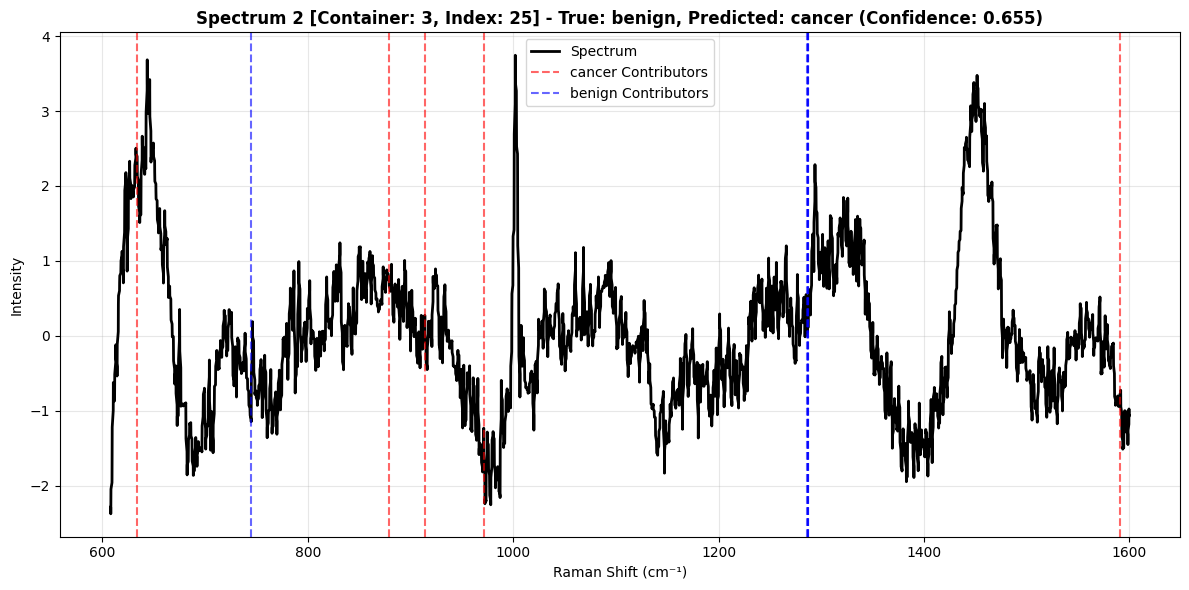

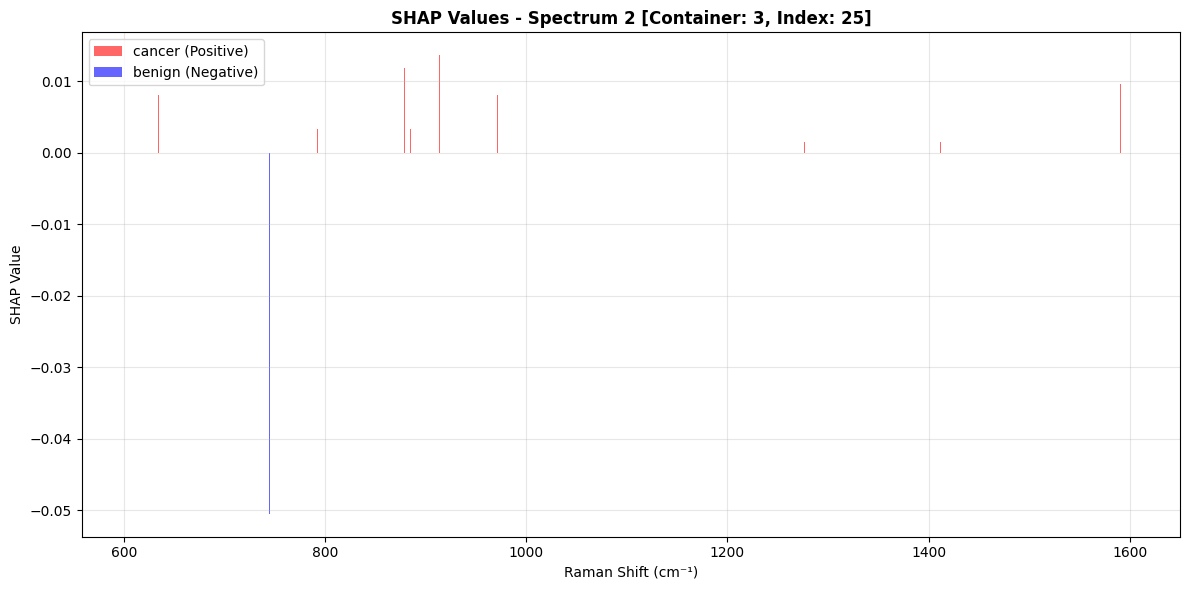

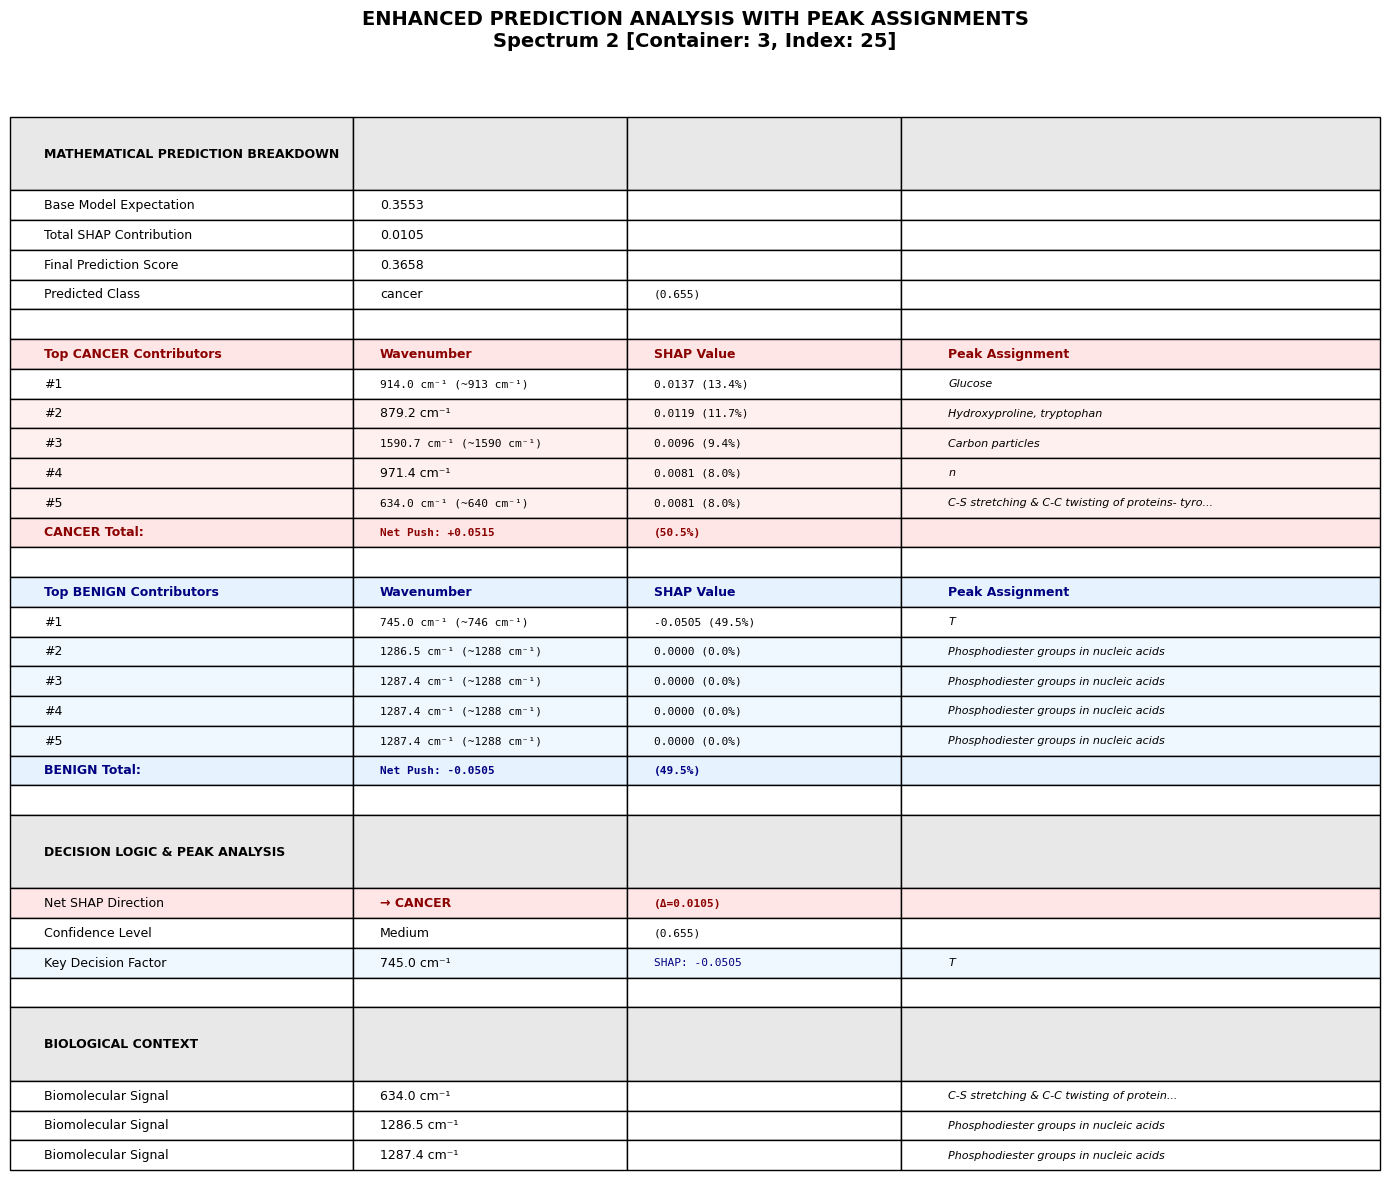

'Spectrum 2 Summary [Container: 3, Index: 25]:'
'  True Label: benign'
'  Predicted: cancer (Confidence: 0.655)'
'  Correct: No'
'  Top cancer contributor: 914.0 cm⁻¹ (SHAP: 0.0137)'
'  Top benign contributor: 745.0 cm⁻¹ (SHAP: -0.0505)'
'\nAnalyzing spectrum 3/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting SHAP explanation analysis...'
🔧 Detecting model type...
📋 Detected CalibratedClassifierCV - extracting base estimator...
📊 Model Analysis:
   - Original model: CalibratedClassifierCV
   - Base estimator: Unknown
   - Using base estimator for SHAP: True
   - SHAP model type: CalibratedClassifierCV
   - Is Calibrated: True, Base SVC: False, Base RF: False, Linear SVC: False
⚡ Optimizing data for performance...
'🔬 Computing SHAP values for 1 samples with 50 background samples...'
🔬 Creating SHAP explainer...
🔄 Using KernelExplainer for CalibratedClassifierCV (fallback mode)...


  0%|          | 0/1 [00:00<?, ?it/s]

/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.374e+00, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(


📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ SHAP explanation completed successfully in 56.59 seconds!'


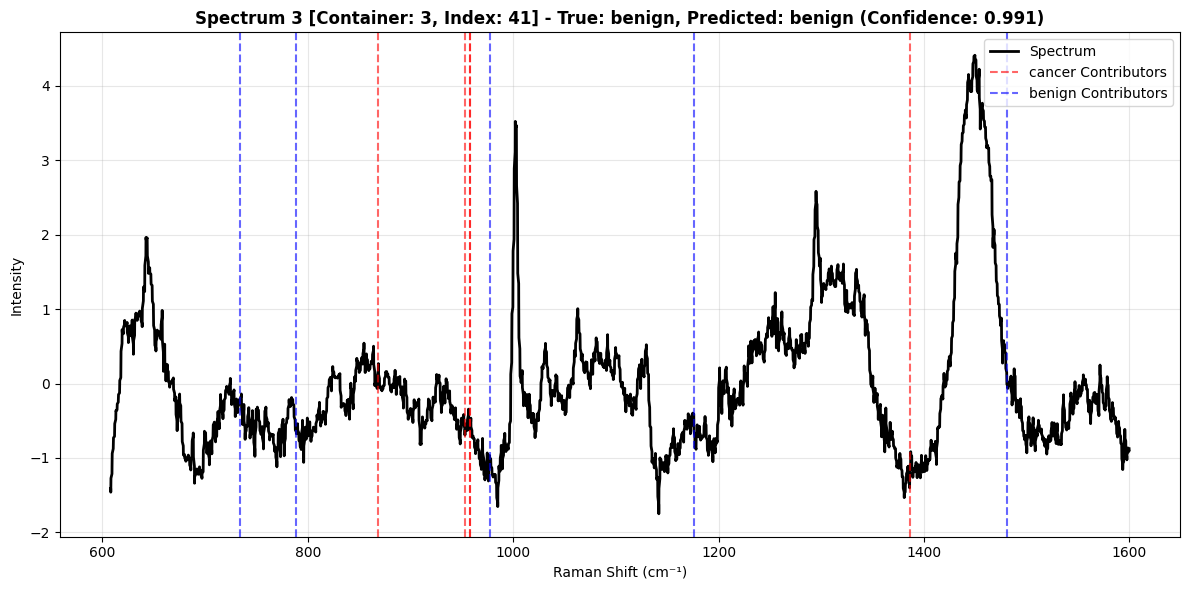

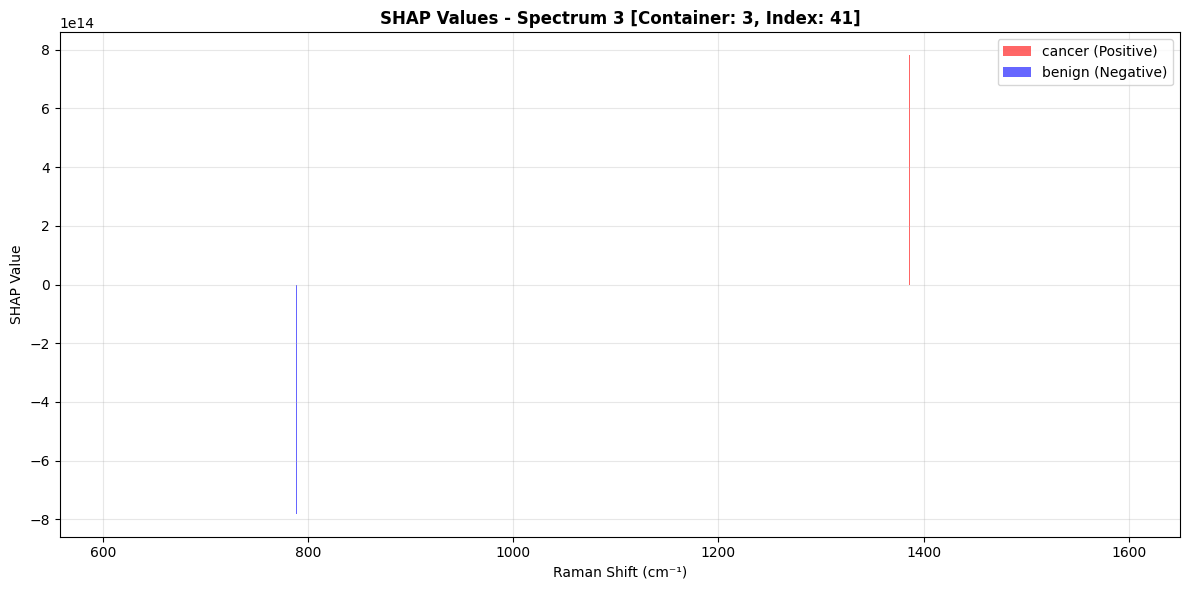

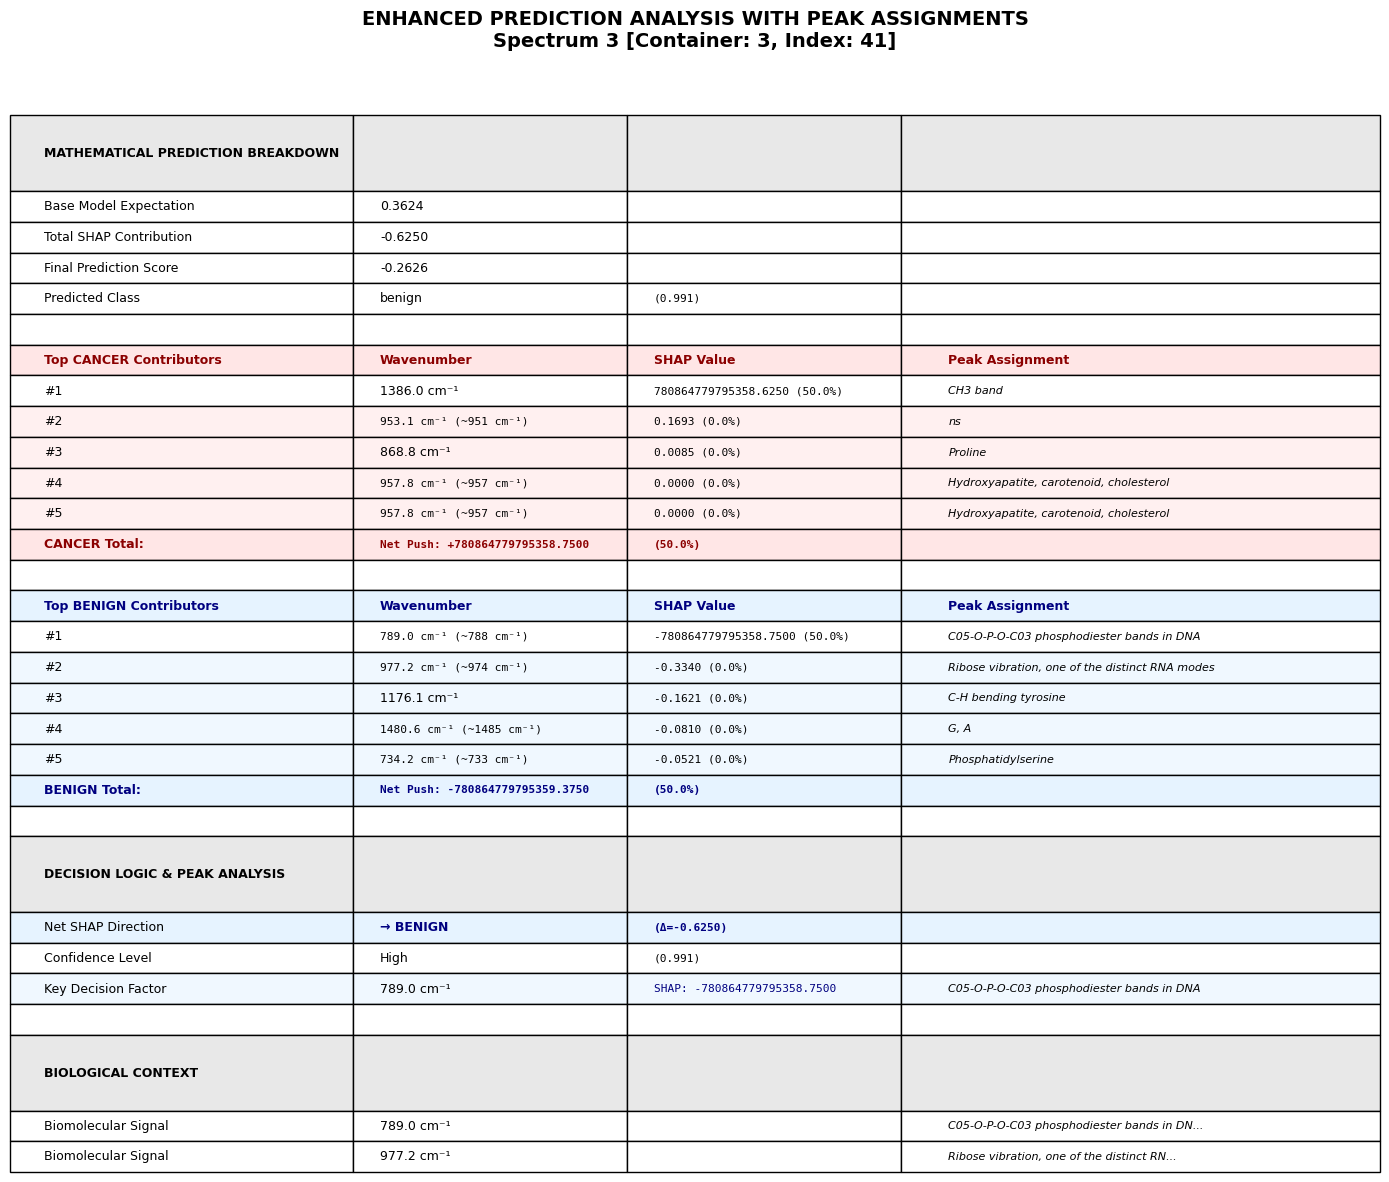

'Spectrum 3 Summary [Container: 3, Index: 41]:'
'  True Label: benign'
'  Predicted: benign (Confidence: 0.991)'
'  Correct: Yes'
'  Top cancer contributor: 1386.0 cm⁻¹ (SHAP: 780864779795358.6250)'
'  Top benign contributor: 789.0 cm⁻¹ (SHAP: -780864779795358.7500)'
'\nAnalyzing spectrum 4/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting SHAP explanation analysis...'
🔧 Detecting model type...
📋 Detected CalibratedClassifierCV - extracting base estimator...
📊 Model Analysis:
   - Original model: CalibratedClassifierCV
   - Base estimator: Unknown
   - Using base estimator for SHAP: True
   - SHAP model type: CalibratedClassifierCV
   - Is Calibrated: True, Base SVC: False, Base RF: False, Linear SVC: False
⚡ Optimizing data for performance...
'🔬 Computing SHAP values for 1 samples with 50 background samples...'
🔬 Creating SHAP explainer...
🔄 Using KernelExplainer for CalibratedClassifierCV (fallback mode)...


  0%|          | 0/1 [00:00<?, ?it/s]

/home/zerozed/coding-j/研究/real-time-raman-spectral-classifier-with-gui/.conda/lib/python3.11/site-packages/shap/explainers/_kernel.py:708: UserWarning: Linear regression equation is singular, a least squares solutions is used instead.
To avoid this situation and get a regular matrix do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
  warnings.warn(


📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ SHAP explanation completed successfully in 37.08 seconds!'


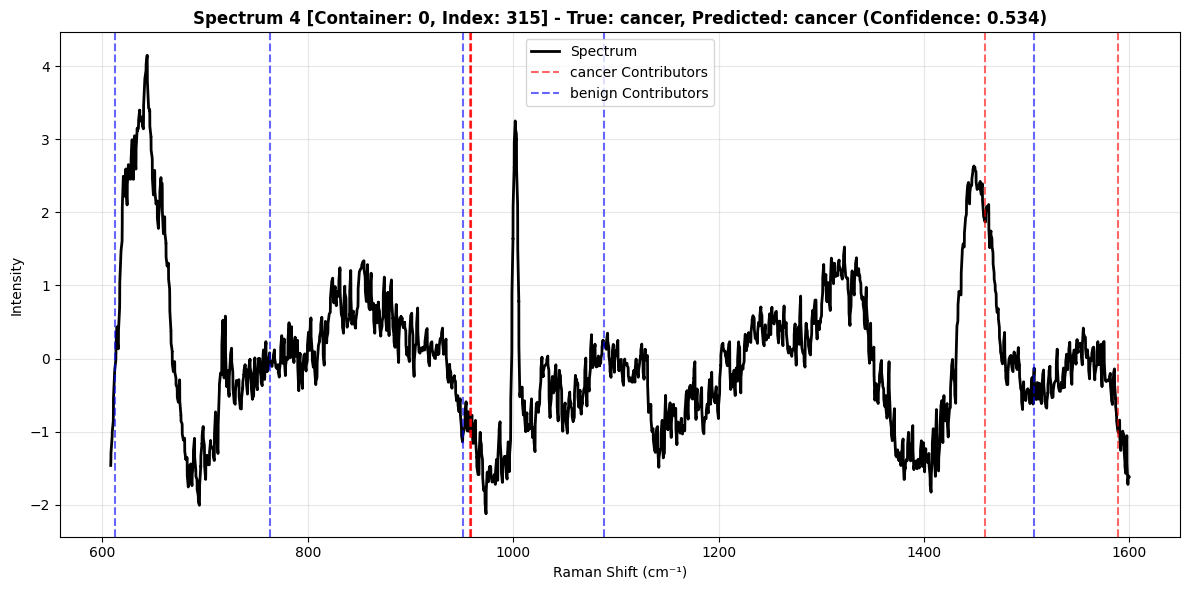

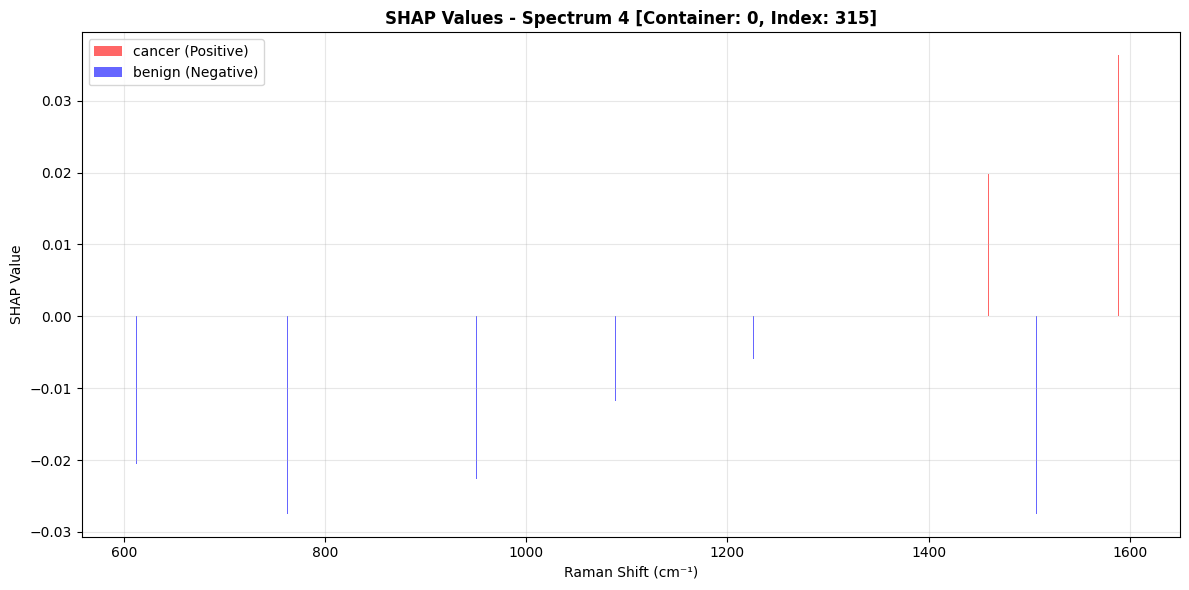

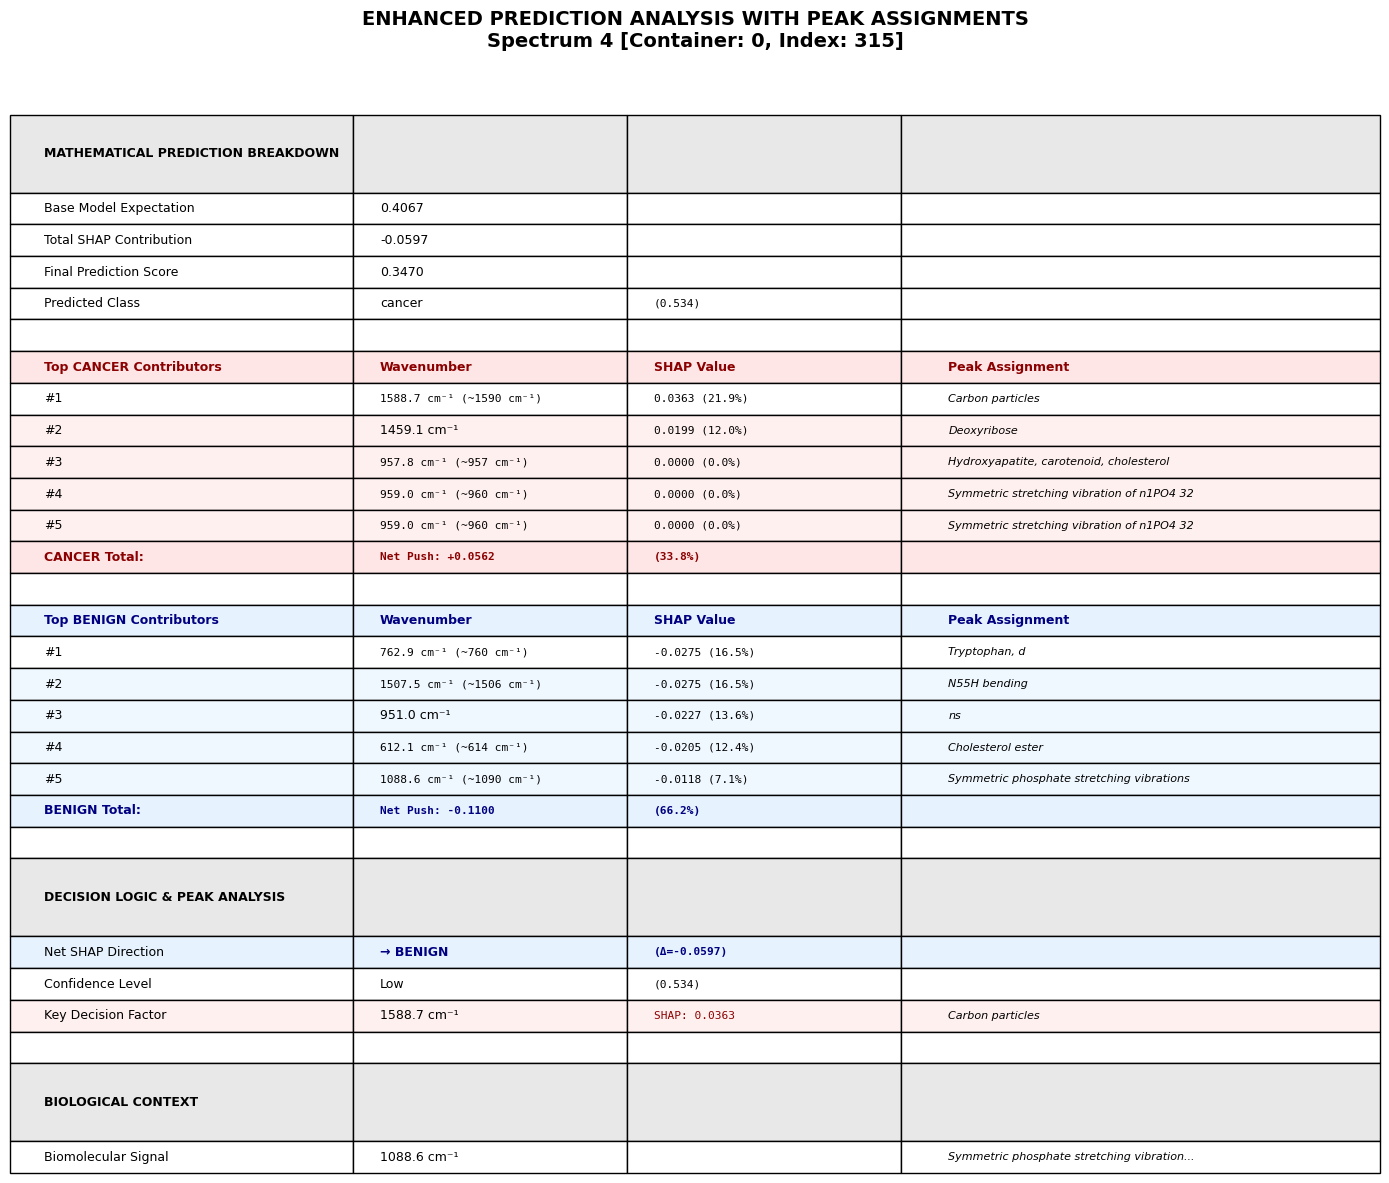

'Spectrum 4 Summary [Container: 0, Index: 315]:'
'  True Label: cancer'
'  Predicted: cancer (Confidence: 0.534)'
'  Correct: Yes'
'  Top cancer contributor: 1588.7 cm⁻¹ (SHAP: 0.0363)'
'  Top benign contributor: 762.9 cm⁻¹ (SHAP: -0.0275)'


In [10]:

# if len(sample_indices) == 0:
#     for key, value in predict_data["prediction_breakdown"].items():
#         try:
#             if len(value) > 0:
#                 sample_indices.append(value[random.randint(0, len(value))][0])
#         except Exception as e:
#             console_log(f"Error processing value for key {key}: {e}")

console_log(f"Sample indices for inspection: {sample_indices}")
inspect_spectra = visual_cccv_svc_linear.inspect_spectra(test_spectra=test_spectra,
                                         true_labels=true_labels,
                                         n_samples=1,
                                         positive_label=labels[1],
                                         negative_label=labels[0],
                                         show_lime_plots=False,
                                         sample_indices=sample_indices,
                                         )

### TESTING WITH SVC LINEAR MODEL (ModPoly)

In [7]:
svc_linear_path = os.path.join(
    CURRENT_DIR,
    "models",
    "SVC-LINEAR",
    "SVC-LINEAR_raman_prostate_model_v1"
)

svc_linear_model = MLModel(
    onnx_path=f"{svc_linear_path}.onnx",
    meta_path=f"{svc_linear_path}.json",
    pickle_path=f"{svc_linear_path}.pkl",
    region=region
)

2025-06-12 03:16:08,029 - load_onnx - INFO - Model loaded from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/SVC-LINEAR/SVC-LINEAR_raman_prostate_model_v1.onnx and metadata from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/SVC-LINEAR/SVC-LINEAR_raman_prostate_model_v1.json
2025-06-12 03:16:08,341 - pickle_load - INFO - Model loaded from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/SVC-LINEAR/SVC-LINEAR_raman_prostate_model_v1.pkl and metadata from /mnt/j/coding/研究/real-time-raman-spectral-classifier-with-gui/models/SVC-LINEAR/SVC-LINEAR_raman_prostate_model_v1.json


In [8]:
svc_linear_get_predictions = svc_linear_model.predict(
    test_spectra=test_spectra,
    true_labels=true_labels,
    use_onnx=False,
)

'Interpolating spectra from 41145 to 24552 features'
'Interpolating spectra from 40380 to 24552 features'
'Interpolating spectra from 4475 to 24552 features'
'Interpolating spectra from 5370 to 24552 features'
'Predicting all 2736 samples'
'Predicting 2736 samples with 24552 features using sklearn'


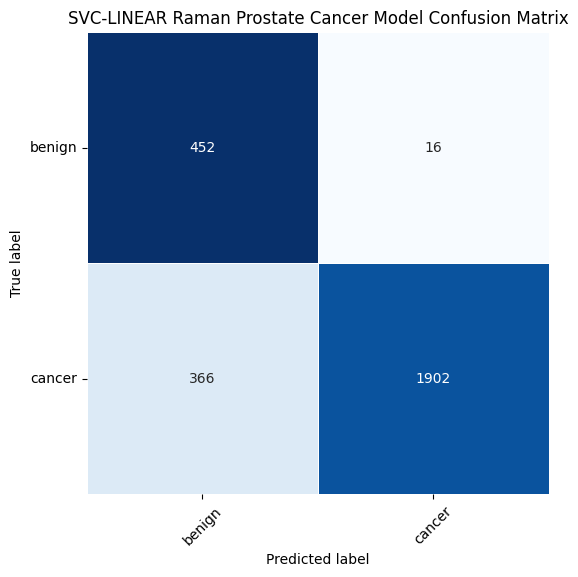

In [9]:
visual_svc_linear = RamanVisualizer(ML_PROPERTY=svc_linear_model)
predict_accuracy, plotdata = visual_svc_linear.confusion_matrix_heatmap(
    y_true=svc_linear_model.y_true,          # true labels for test set
    y_pred=svc_linear_model.y_pred,  # predicted labels for test set
    class_labels=labels,    # class names, e.g. ["benign", "cancer"]
    title=f"{svc_linear_model._name} Confusion Matrix",
    normalize=False,
    cmap="Blues",
    figsize=(8, 6),
    fmt="d",
)

console_log("Predict Accuracy:")
console_log("=====================================")
for i, (label, percentage) in enumerate(predict_accuracy.items()):
    console_log(f"{label}: {percentage:.2f}%")

'Sample indices for inspection: [15, 2565, 2581, 315]'
'Using MLModel with model type: SVC'
'📊 Using provided test_spectra and true_labels'
'Inspecting 4 spectra...'
'\nAnalyzing spectrum 1/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting SHAP explanation analysis...'
🔧 Detecting model type...
📊 Model Analysis:
   - Original model: SVC
   - SHAP model type: SVC
   - Is Calibrated: False, Base SVC: True, Base RF: False, Linear SVC: True
⚡ Optimizing data for performance...
'🔬 Computing SHAP values for 1 samples with 50 background samples...'
🔬 Creating SHAP explainer...
📏 Using LinearExplainer for Linear SVC model...
📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ SHAP explanation completed successfully in 0.09 seconds!'


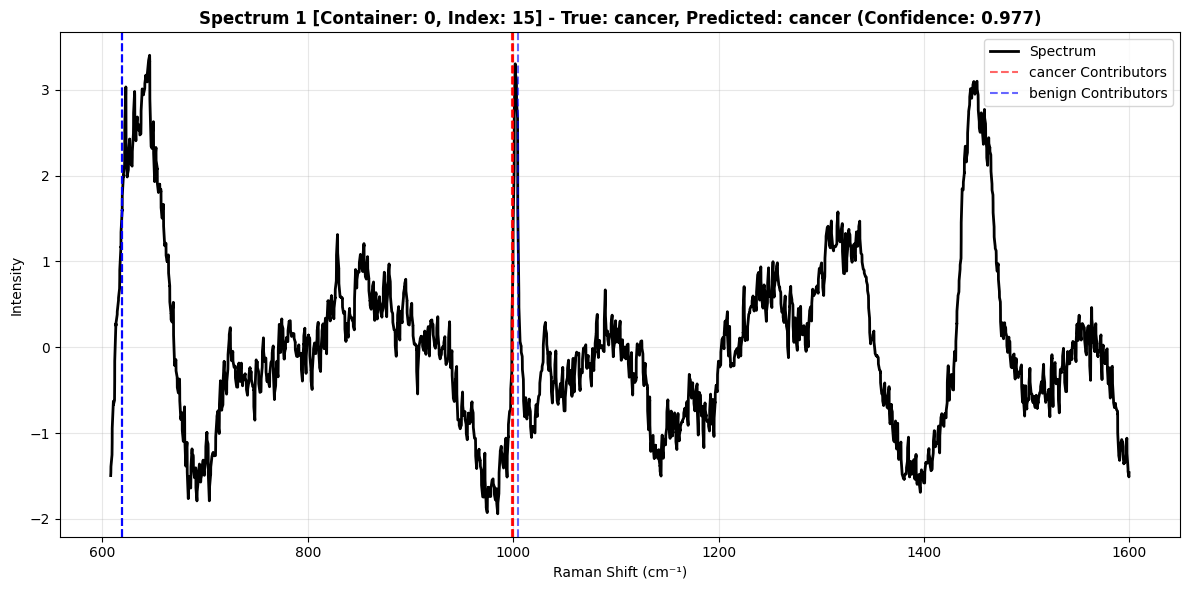

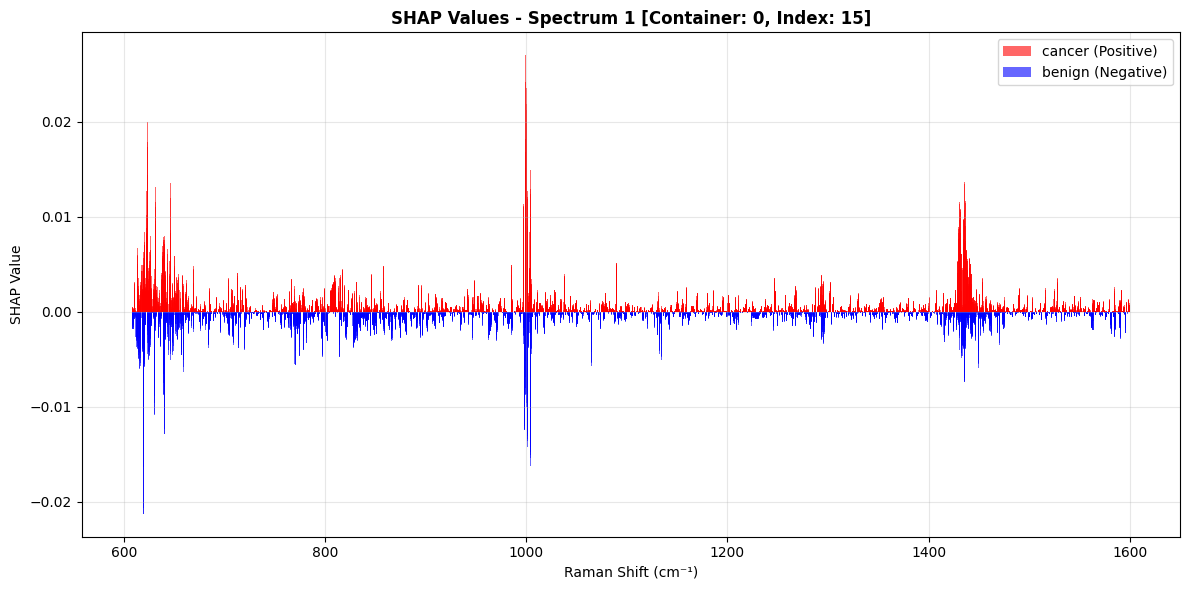

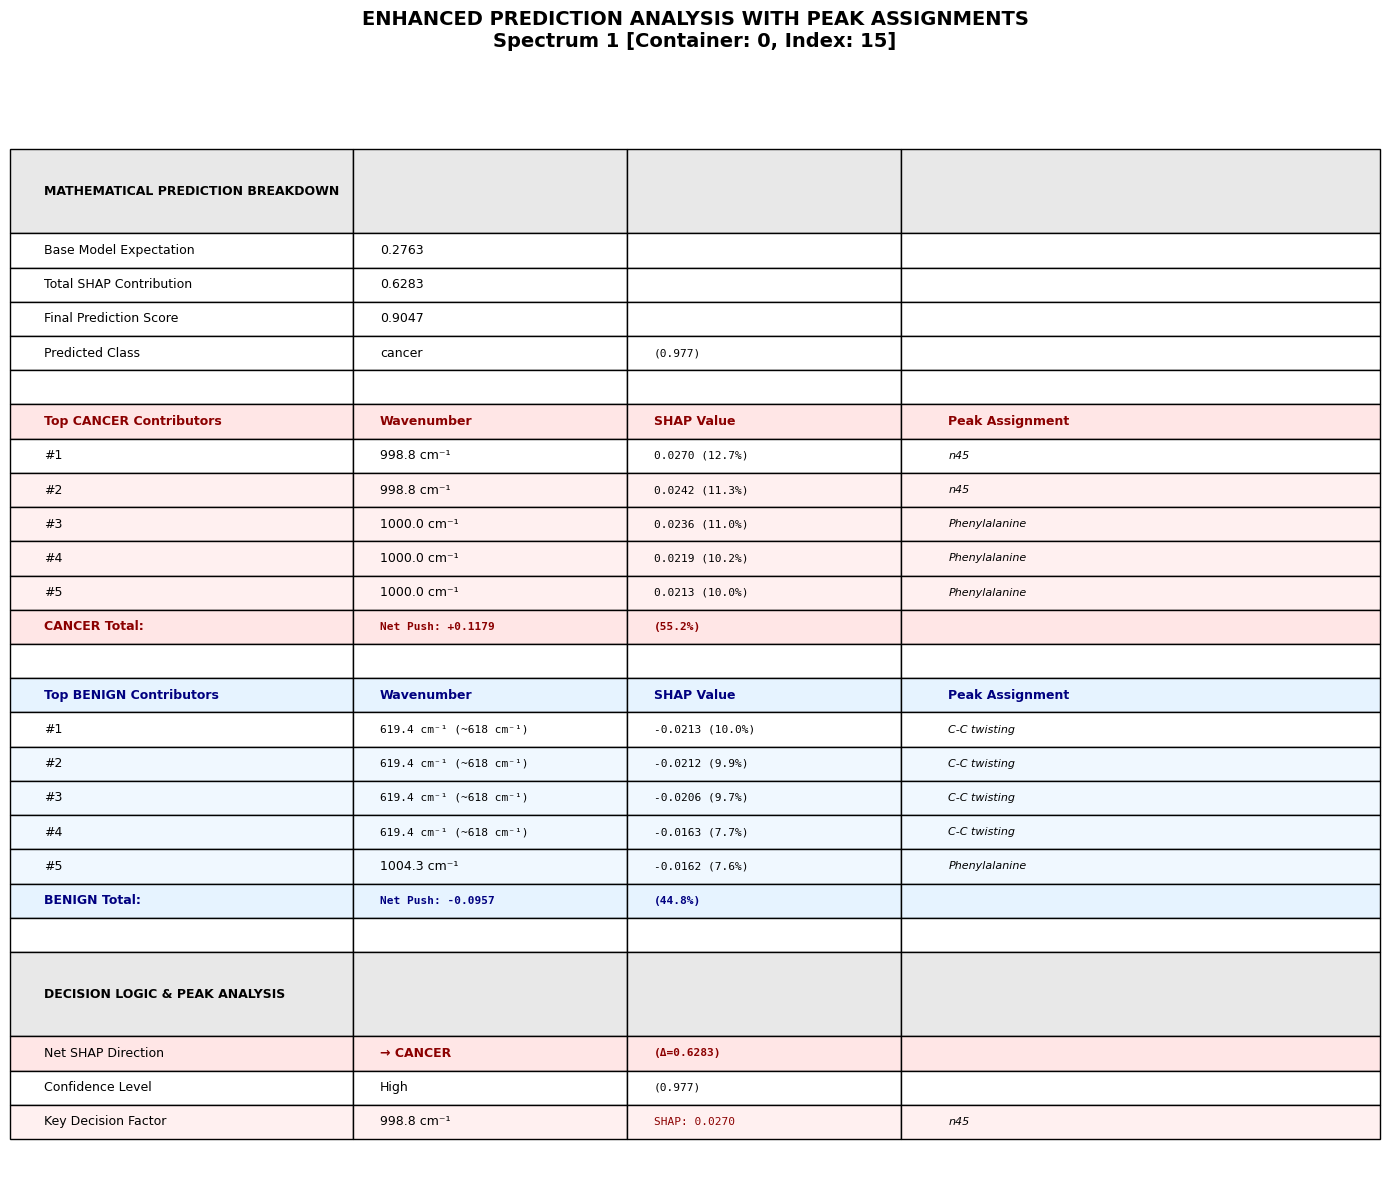

'Spectrum 1 Summary [Container: 0, Index: 15]:'
'  True Label: cancer'
'  Predicted: cancer (Confidence: 0.977)'
'  Correct: Yes'
'  Top cancer contributor: 998.8 cm⁻¹ (SHAP: 0.0270)'
'  Top benign contributor: 619.4 cm⁻¹ (SHAP: -0.0213)'
'\nAnalyzing spectrum 2/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting SHAP explanation analysis...'
🔧 Detecting model type...
📊 Model Analysis:
   - Original model: SVC
   - SHAP model type: SVC
   - Is Calibrated: False, Base SVC: True, Base RF: False, Linear SVC: True
⚡ Optimizing data for performance...
'🔬 Computing SHAP values for 1 samples with 50 background samples...'
🔬 Creating SHAP explainer...
📏 Using LinearExplainer for Linear SVC model...
📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ SHAP explanation completed successfully in 0.08 seconds!'


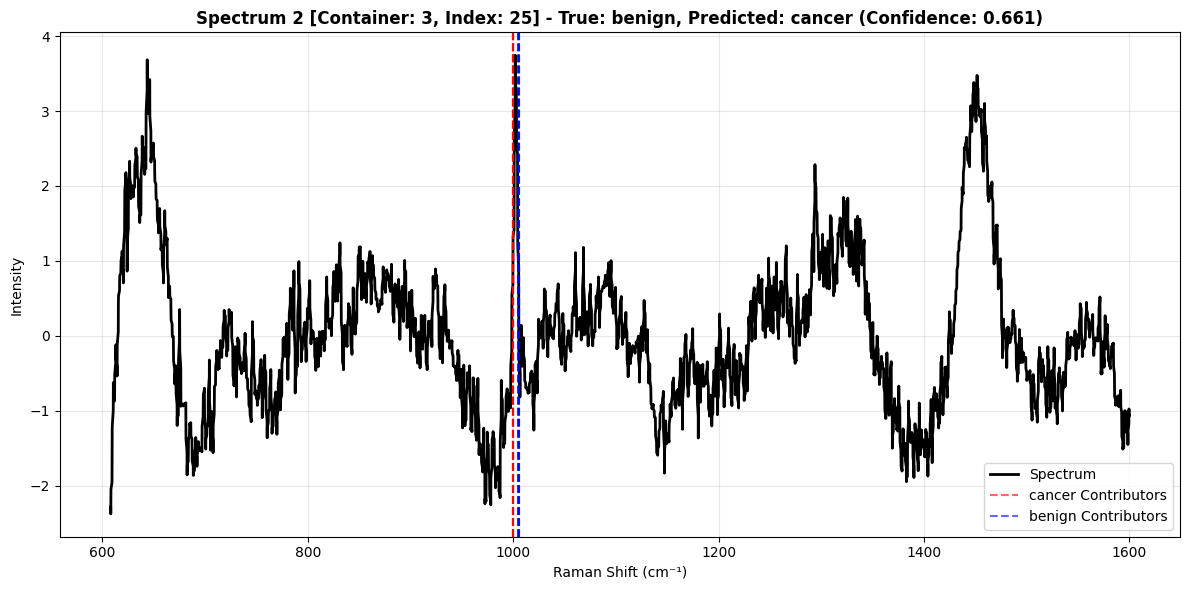

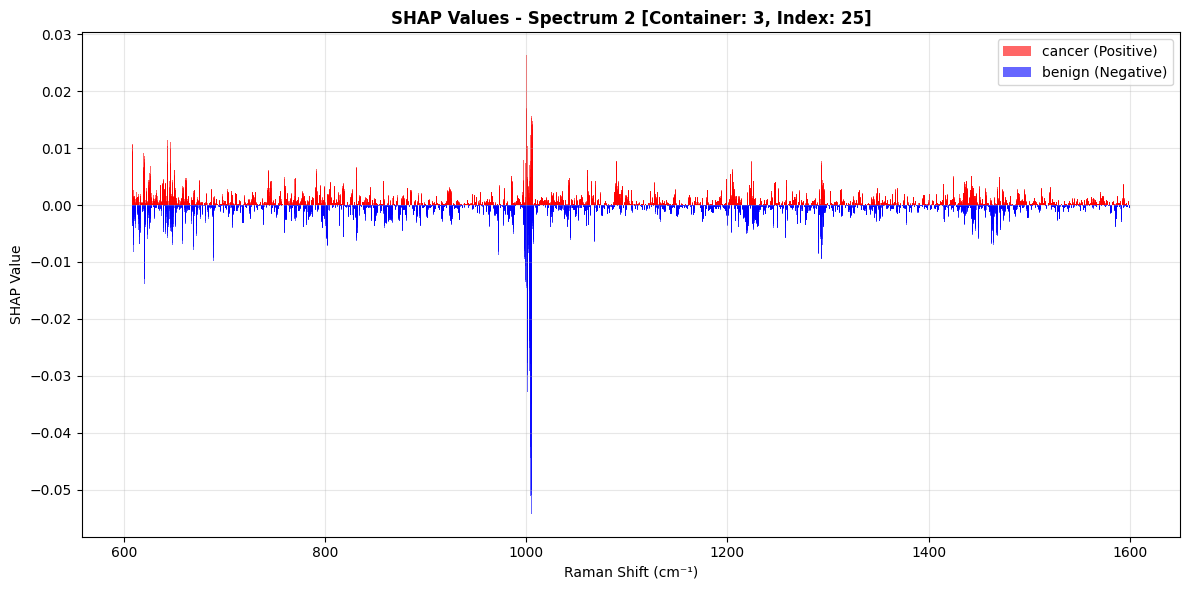

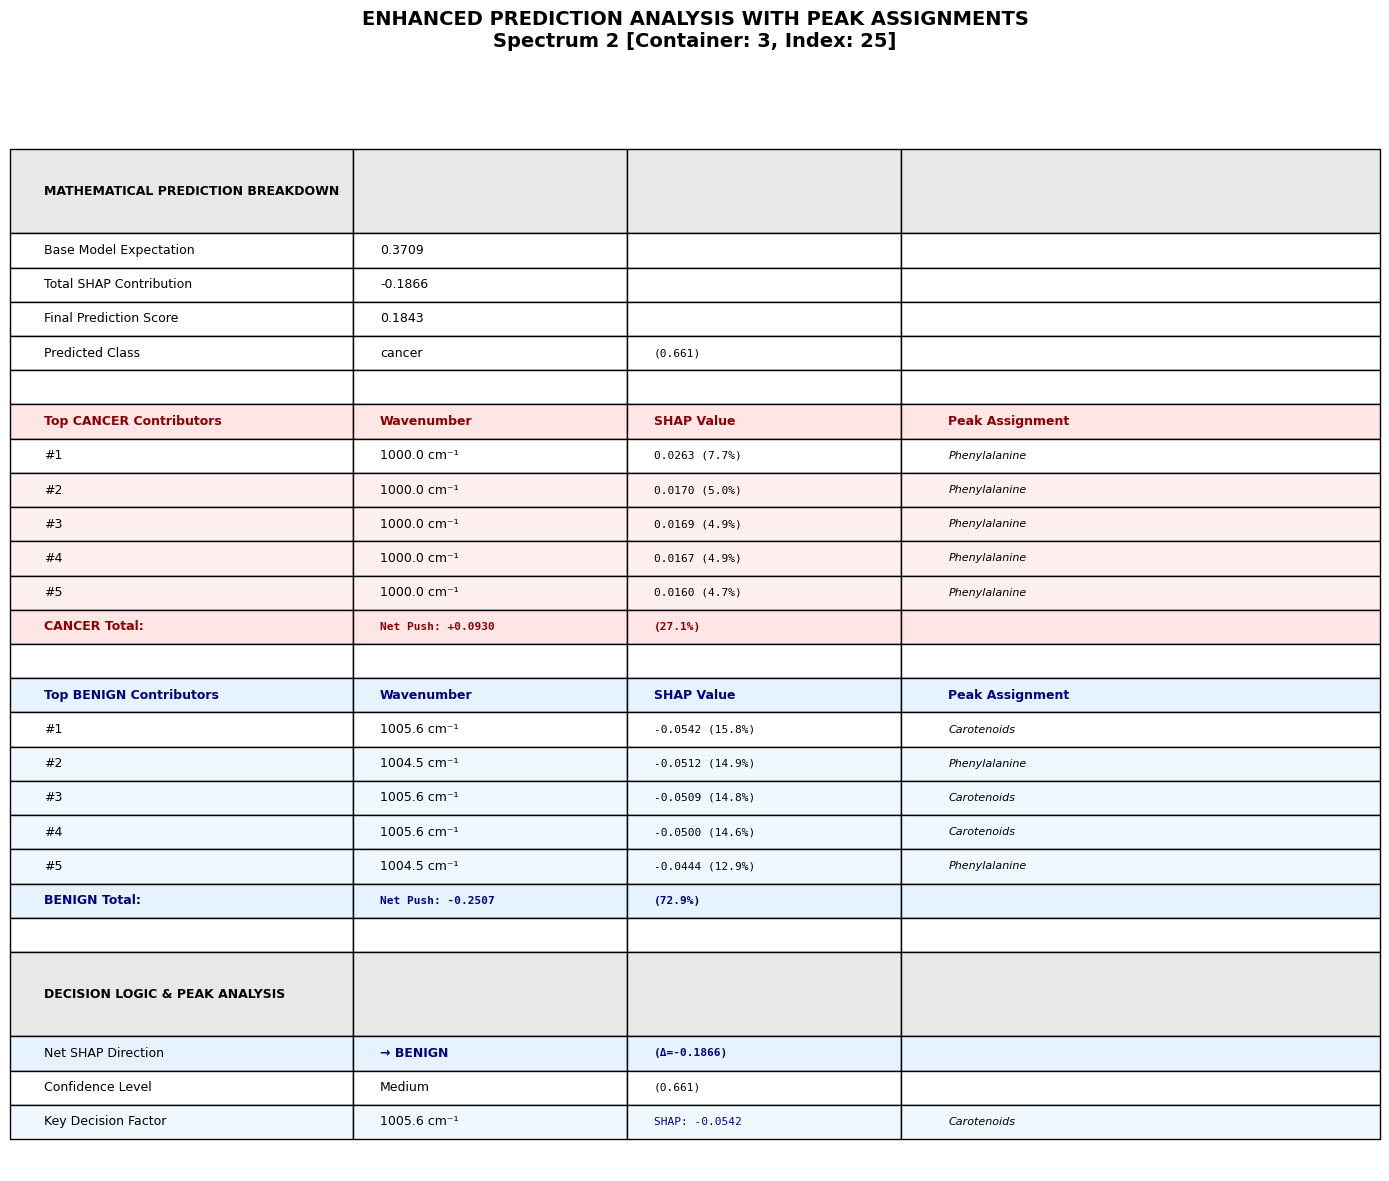

'Spectrum 2 Summary [Container: 3, Index: 25]:'
'  True Label: benign'
'  Predicted: cancer (Confidence: 0.661)'
'  Correct: No'
'  Top cancer contributor: 1000.0 cm⁻¹ (SHAP: 0.0263)'
'  Top benign contributor: 1005.6 cm⁻¹ (SHAP: -0.0542)'
'\nAnalyzing spectrum 3/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting SHAP explanation analysis...'
🔧 Detecting model type...
📊 Model Analysis:
   - Original model: SVC
   - SHAP model type: SVC
   - Is Calibrated: False, Base SVC: True, Base RF: False, Linear SVC: True
⚡ Optimizing data for performance...
'🔬 Computing SHAP values for 1 samples with 50 background samples...'
🔬 Creating SHAP explainer...
📏 Using LinearExplainer for Linear SVC model...
📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ SHAP explanation completed successfully in 0.07 seconds!'


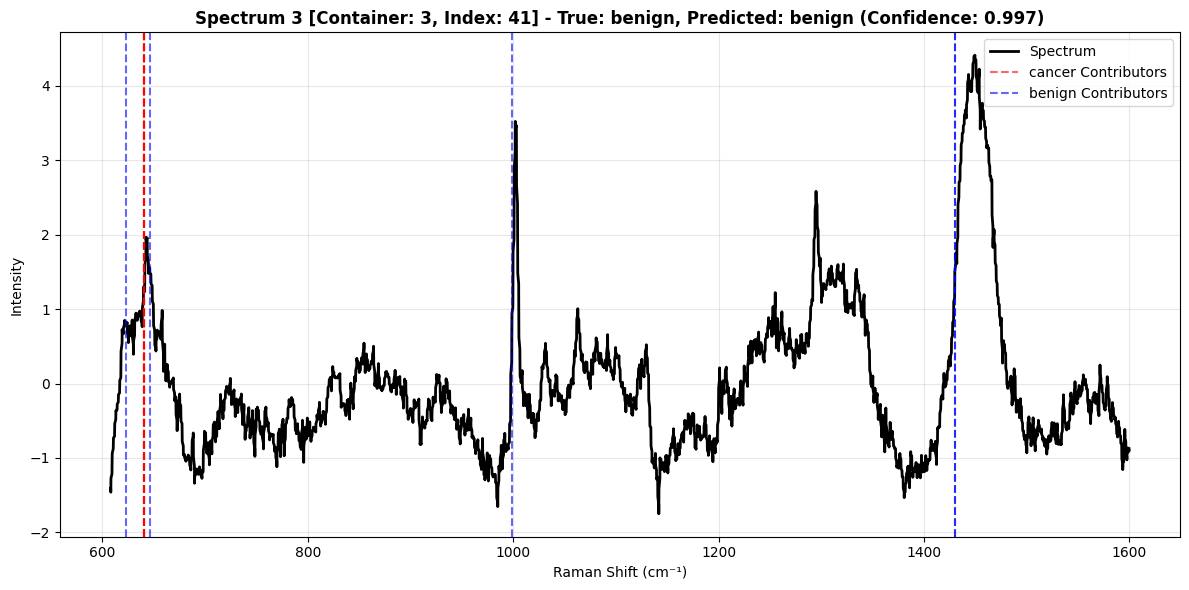

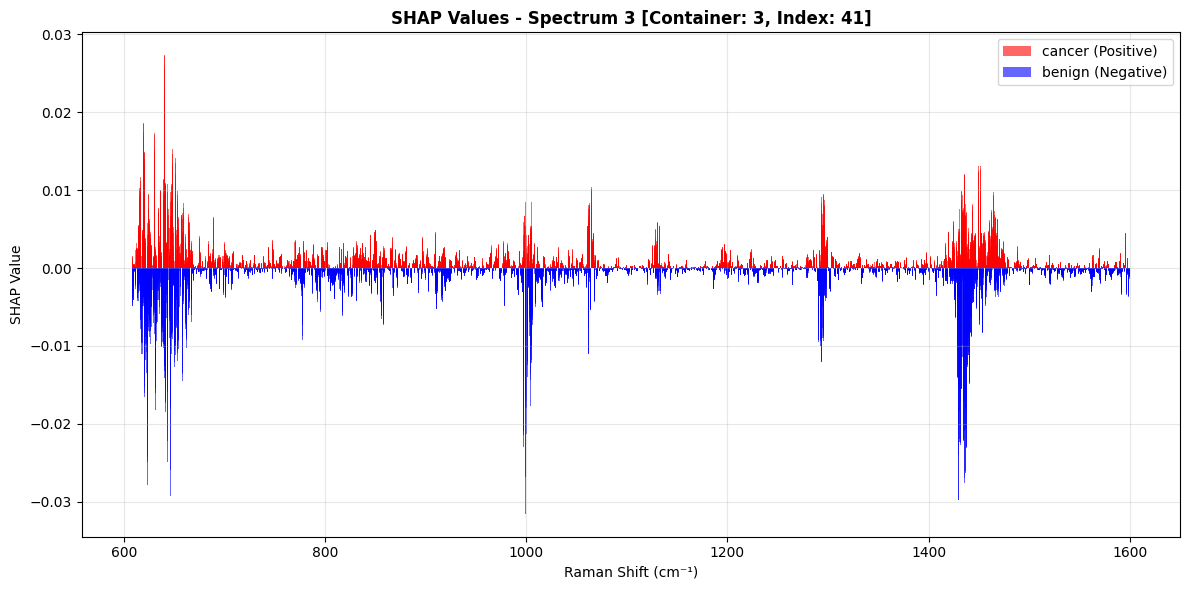

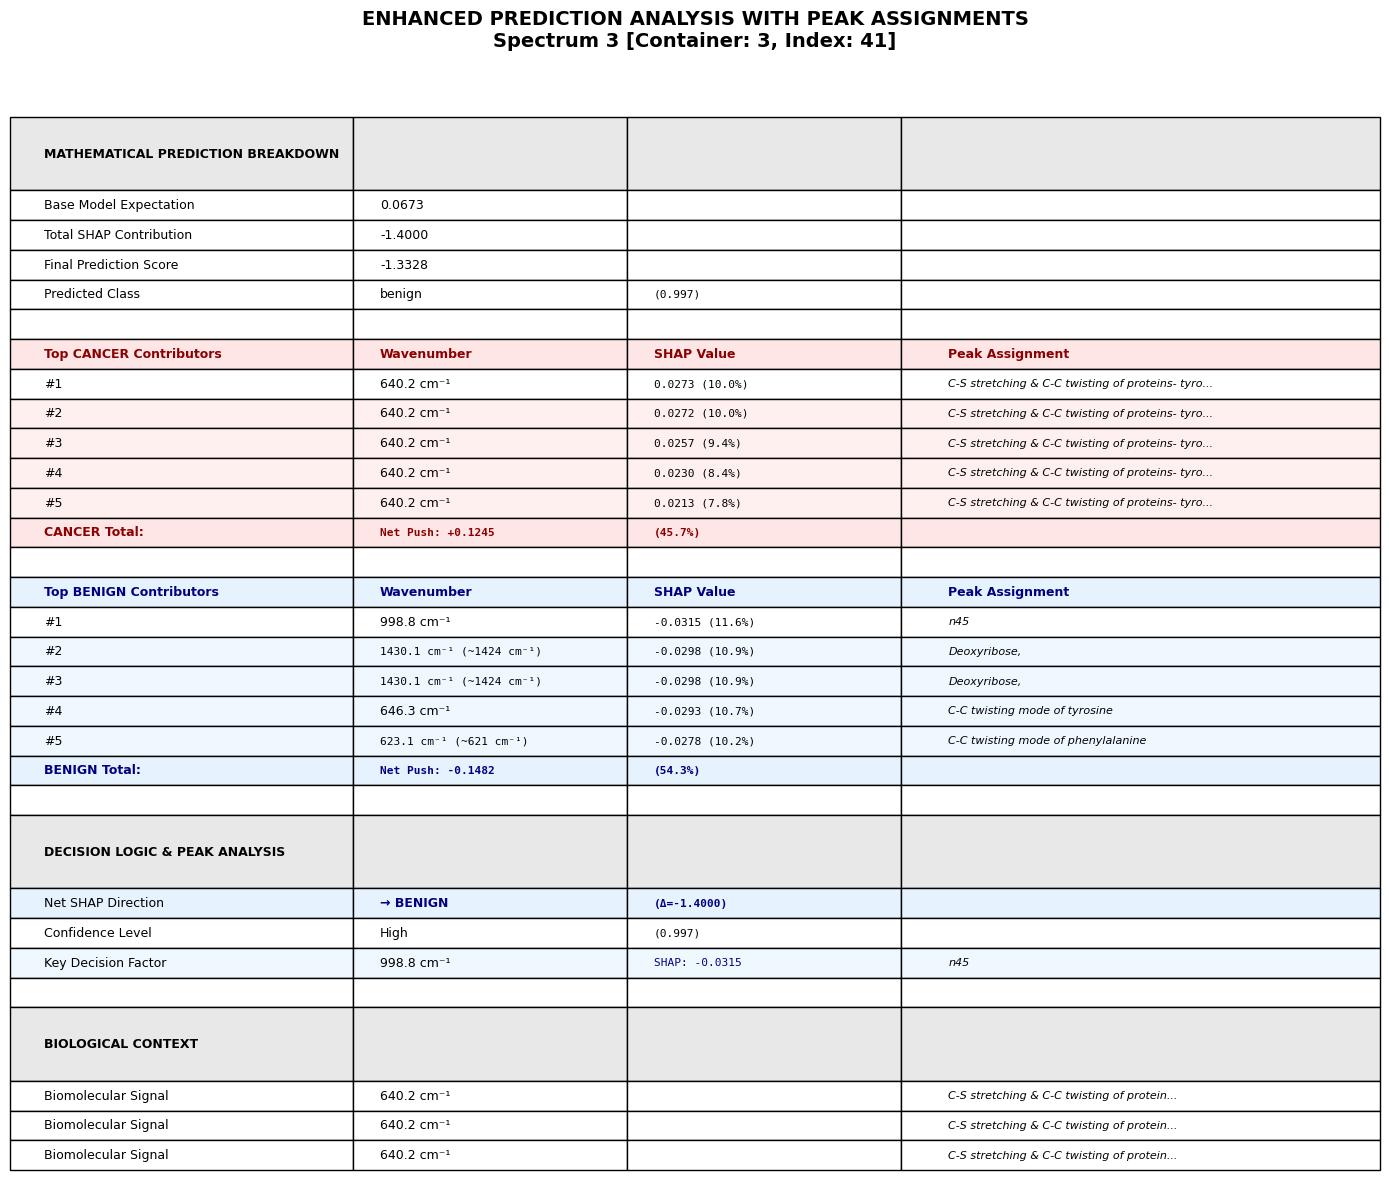

'Spectrum 3 Summary [Container: 3, Index: 41]:'
'  True Label: benign'
'  Predicted: benign (Confidence: 0.997)'
'  Correct: Yes'
'  Top cancer contributor: 640.2 cm⁻¹ (SHAP: 0.0273)'
'  Top benign contributor: 998.8 cm⁻¹ (SHAP: -0.0315)'
'\nAnalyzing spectrum 4/4...'
'Using test data subset with 50 samples for SHAP background'
'🚀 Starting SHAP explanation analysis...'
🔧 Detecting model type...
📊 Model Analysis:
   - Original model: SVC
   - SHAP model type: SVC
   - Is Calibrated: False, Base SVC: True, Base RF: False, Linear SVC: True
⚡ Optimizing data for performance...
'🔬 Computing SHAP values for 1 samples with 50 background samples...'
🔬 Creating SHAP explainer...
📏 Using LinearExplainer for Linear SVC model...
📊 Processing SHAP values...
📈 Determined n_classes: 2 from SHAP values format
🎯 Extracting top features...
📋 Compiling final results...
'✅ SHAP explanation completed successfully in 0.04 seconds!'


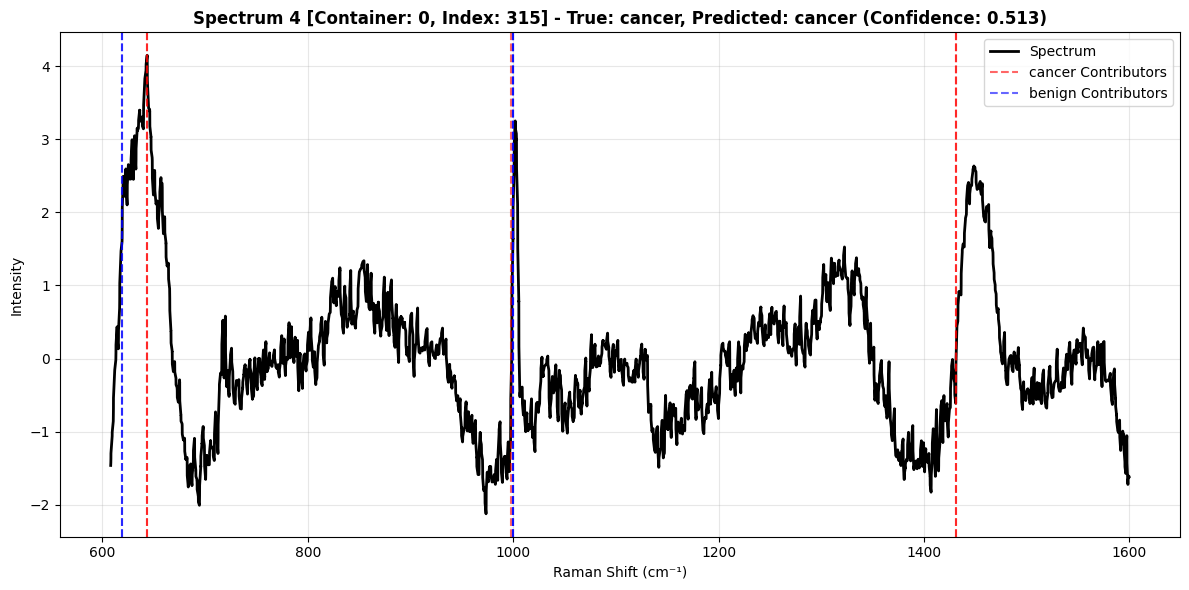

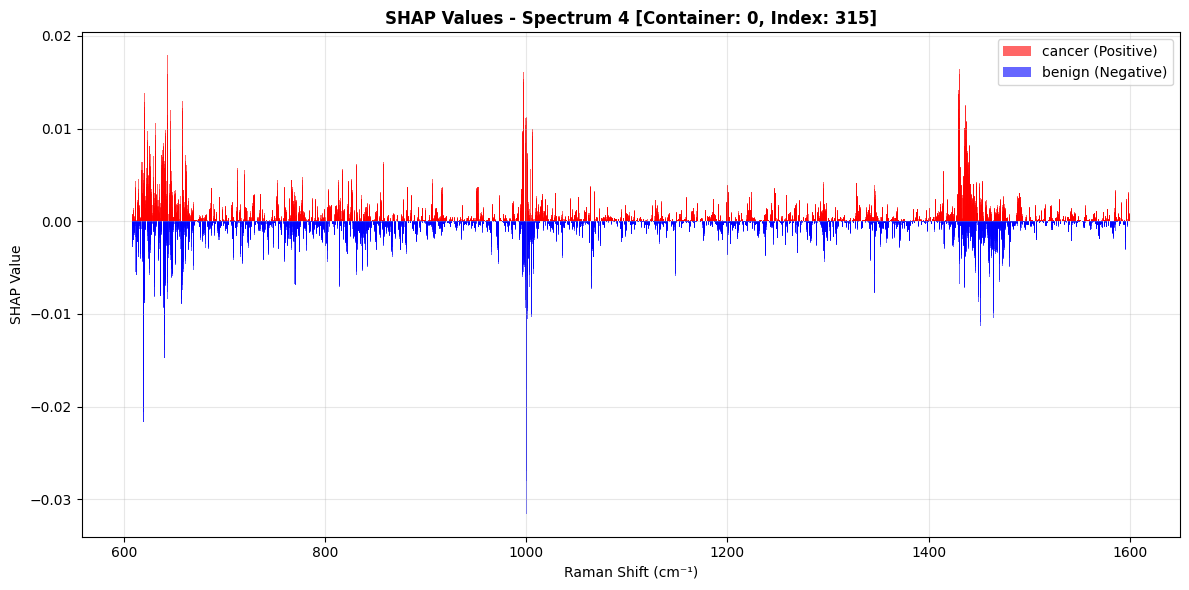

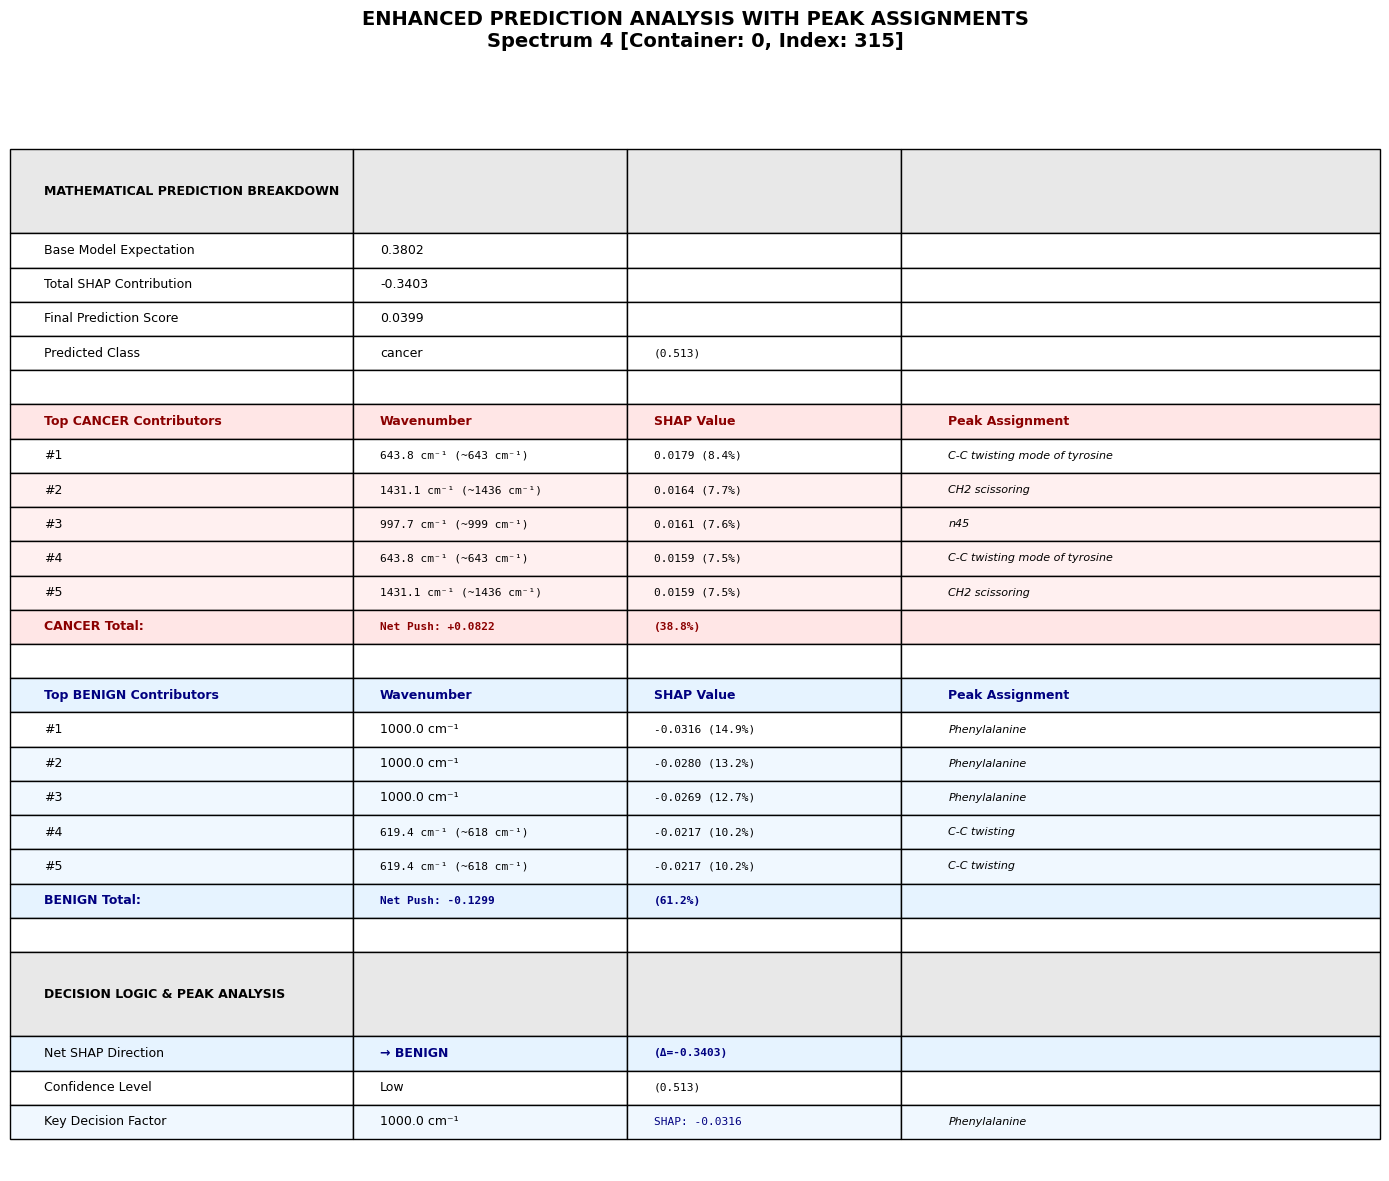

'Spectrum 4 Summary [Container: 0, Index: 315]:'
'  True Label: cancer'
'  Predicted: cancer (Confidence: 0.513)'
'  Correct: Yes'
'  Top cancer contributor: 643.8 cm⁻¹ (SHAP: 0.0179)'
'  Top benign contributor: 1000.0 cm⁻¹ (SHAP: -0.0316)'


In [ ]:
console_log(f"Sample indices for inspection: {sample_indices}")
inspect_spectra = visual_svc_linear.inspect_spectra(test_spectra=test_spectra,
                                                         true_labels=true_labels,
                                                         n_samples=1,
                                                         positive_label=labels[1],
                                                         negative_label=labels[0],
                                                         show_lime_plots=False,
                                                         sample_indices=sample_indices,
                                                         )
